# TODO

- don't use ratios as features. just don't
- add praise length
- use recd_praises instead praise pct
- add active days
- drop comments
- get in touch with Jess J re example users & feature set


- write function for undo zscore (this would be pretty great and not hard with a bit of focus)
 - X = Z * std - mean
- write function for creating a pdf for bonus points

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('MacOSX')

###Featureset dictionary
1 column    
2 names
3 here

In [9]:
csv = pd.read_csv("ambassador_selection2.csv")
fs = '3'

csv = csv.loc[csv['comments']>19,].dropna().reset_index(drop=True) # threshold on feature, drop rows with na values
strip = csv[(np.abs(stats.zscore(csv)) < 3).all(axis=1)].reset_index(drop=True) # remove crazy outliers
drop = pd.DataFrame(strip.iloc[:,2:5]) # drop the user_ids and any other features you wish to discard
data = pd.DataFrame(scale(drop)) # use this for < 4D
#data3D = pd.DataFrame(PCA(n_components=3).fit_transform(data)) # Reduce dimensions from 4 to 3 for visualization
data2D = pd.DataFrame(PCA(n_components=2).fit_transform(data)) # Reduce dimensions from 4 to 2 for visualization

# run kmeans with 10 sets of clusters seeds
# extract classification labels and cluster centers 
# do some prep for vizualization
def cluster_it_up(N):
    kmeans = KMeans(init = 'k-means++', n_clusters = N, n_init = 100).fit(data) # it's as easy as a function call
    labels = pd.DataFrame((kmeans.labels_)) # extract labels
    centers = pd.DataFrame(kmeans.cluster_centers_) # extract centers
    centers.columns = drop.columns # give centers table readable column names
    labels.columns = ['label'] # the plural of columns is incorrect here
    clust_out = pd.concat([strip, labels], axis=1, join_axes = [strip.index])
    viz3D = pd.concat([data, labels], axis = 1, join_axes = [data.index])
    viz2D = pd.concat([data2D, labels], axis = 1, join_axes = [data2D.index])
    return clust_out, centers, N, strip, data, labels, viz3D, viz2D

In [ ]:
clust_out.to_csv('~/Google Drive/ambassador_selection/' + str(N) + '_clus_fs' + fs)

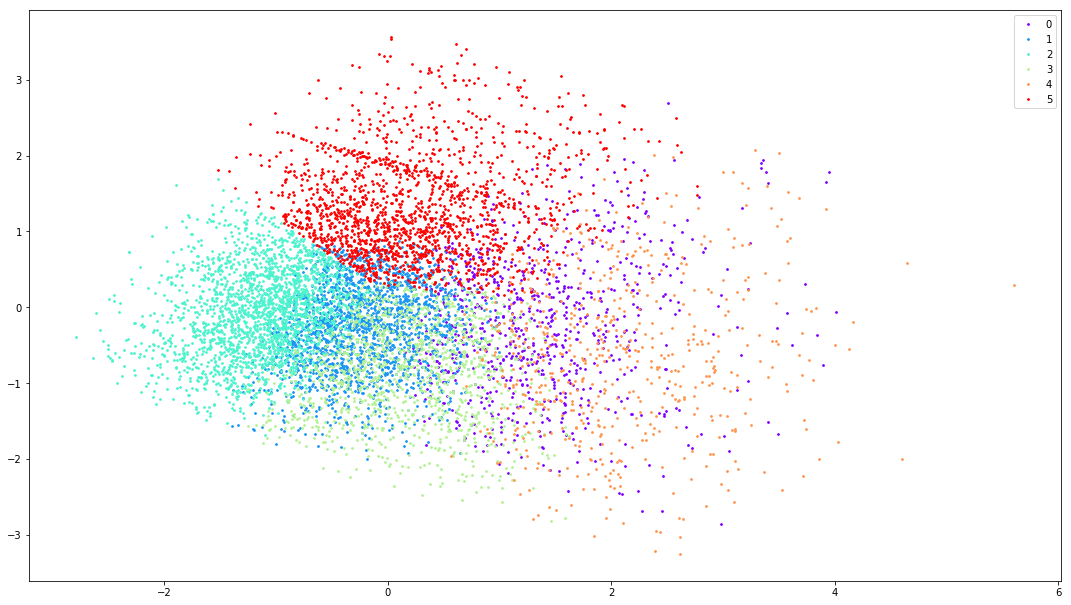

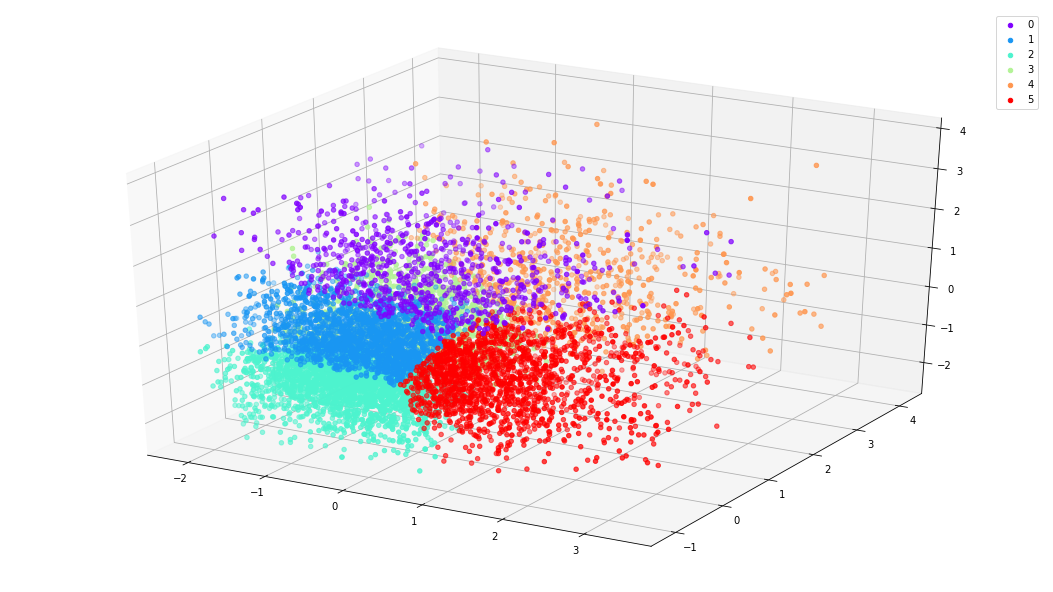

,praised_pct,comments_per_item,avg_comment_length
0,0.252323,-0.075474,2.025273
1,-0.400981,-0.498111,0.417122
2,-0.538662,-0.572586,-0.869125
3,-0.623943,0.923770,-0.208178
4,0.447534,2.508931,0.452790
5,1.309861,-0.211394,-0.290296


In [10]:
clust_out, centers, N, strip, data, labels, viz3D, viz2D  = cluster_it_up(6)

%matplotlib inline
colors = plt.cm.rainbow(np.linspace(0, 1, len(centers)))

#2D viz
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
for i,c in enumerate(colors):
    single_clus = viz2D.loc[viz2D['label'] == i]
    plt.scatter(single_clus[0], single_clus[1], s=3, c = c, label=str(i))
plt.legend()
plt.show()

#3D viz
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
for i,c in enumerate(colors):
    single_clus = viz3D.loc[viz3D['label'] == i]
    ax.scatter(single_clus[0], single_clus[1], single_clus[2], s=20, c = c, label=str(i))
plt.legend()
plt.show()

#scatter matrix
#scatter_matrix(data, alpha=0.1, figsize=(6, 6), diagonal='kde')
#plt.show()

centers

### The cluster we care about is actually the one buried in the center! Clusters with a center that is well above the mean for the most part inlcude lots of users that are deficient in some activity, because we are using ratios as features.

In [13]:
clust_out

,user_id,comments,praised_pct,comments_per_item,avg_comment_length,label
0,763223,85,0.180000,1.049383,3.0,2
1,2340290,21,0.234375,1.050000,4.0,2
2,1910269,24,0.250000,1.000000,4.0,2
3,1547792,25,0.250000,1.000000,4.0,2
4,412096,284,0.285714,1.028986,4.0,2
5,428714,29,0.375000,1.000000,4.0,2
6,1084352,46,0.142857,1.022222,4.0,2
7,683745,133,0.175000,1.146552,5.0,2
8,3047364,165,0.095238,1.000000,5.0,2
9,1175949,441,0.209790,1.035211,5.0,2


In [26]:
good_clus = pd.DataFrame(clust_out.loc[clust_out['label'] == 3])
good_clus.sort_values(by = ['avg_comment_length','comments','comments_per_item'], ascending = [False,False,False], inplace = True) 

In [27]:
good_clus

,user_id,comments,praised_pct,comments_per_item,avg_comment_length,label
8038,715333,55,0.050000,1.666667,59.0,3
7939,2256417,58,0.173913,1.567568,57.0,3
7891,1627295,76,0.078431,1.583333,56.0,3
7888,683516,67,0.185185,1.558140,56.0,3
7847,582435,21,0.150000,1.500000,56.0,3
7795,1697495,34,0.142857,1.545455,55.0,3
7786,203897,25,0.136364,1.562500,55.0,3
7781,2429670,21,0.142857,1.500000,55.0,3
7773,566578,157,0.177966,1.602041,54.0,3
7771,291220,131,0.135827,1.488636,54.0,3


In [23]:
target_clus

,user_id,comments,praised_pct,comments_per_item,avg_comment_length,label
5112,1437981,461,0.227692,1.287709,36.0,3
2034,79227,449,0.269231,1.312865,25.0,3
5832,1348218,437,0.316742,1.405145,39.0,3
4045,1156428,435,0.148148,1.635338,32.0,3
3422,838337,429,0.203125,1.328173,30.0,3
2868,3557801,423,0.227848,1.301538,28.0,3
4873,2291066,408,0.235294,1.645161,35.0,3
5584,3177803,408,0.323383,1.451957,38.0,3
1092,1105576,406,0.203125,1.492647,21.0,3
1485,476208,402,0.194234,1.386207,23.0,3
